In [138]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [139]:
# http://b.aksy.space/Python/508.html


!pip install matplotlib==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.0.0-cp37-cp37m-manylinux1_x86_64.whl (12.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires matplotlib!=3.0.0,>=2.0.2, but you have matplotlib 3.0.0 which is incompatible.
scikit-image 0.18.3 requires matplotlib!=3.0.0,>=2.0.0, but you have matplotlib 3.0.0 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.0 which is incompatible.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.0.0 which is i

In [140]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [141]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
kmnist_train = torchvision.datasets.KMNIST(
  root="../data", train=True, transform=trans, download=True)
kmnist_test = torchvision.datasets.KMNIST(
  root="../data", train=False, transform=trans, download=True)


In [142]:
len(kmnist_train), len(kmnist_test)


(60000, 10000)

In [143]:
kmnist_train[0][0].shape


torch.Size([1, 28, 28])

In [144]:
kmnist_train

Dataset KMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [145]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      #print(i)
      ax.imshow(img.numpy())
      #plt.imshow(np.squeeze(imgs[i]))

    else:
      # PIL Image
      ax.imshow(img)
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)
      if titles:
        ax.set_title(titles[i]);
  return axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5927c5b8d0>,
      dtype=object)

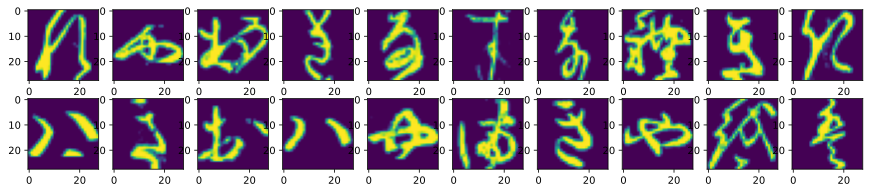

In [146]:
X, y = next(iter(data.DataLoader(kmnist_train, batch_size=20)))
#(batch * channel) * height * width
show_images(X.reshape(20, 28, 28), 2, 10, titles = y.tolist())

#ImportError: cannot import name '_check_savefig_extra_args' from 'matplotlib.backend_bases' (/usr/local/lib/python3.7/dist-packages/matplotlib/backend_bases.py)
#의 문제를 http://b.aksy.space/Python/508.html을 참고하여 해결

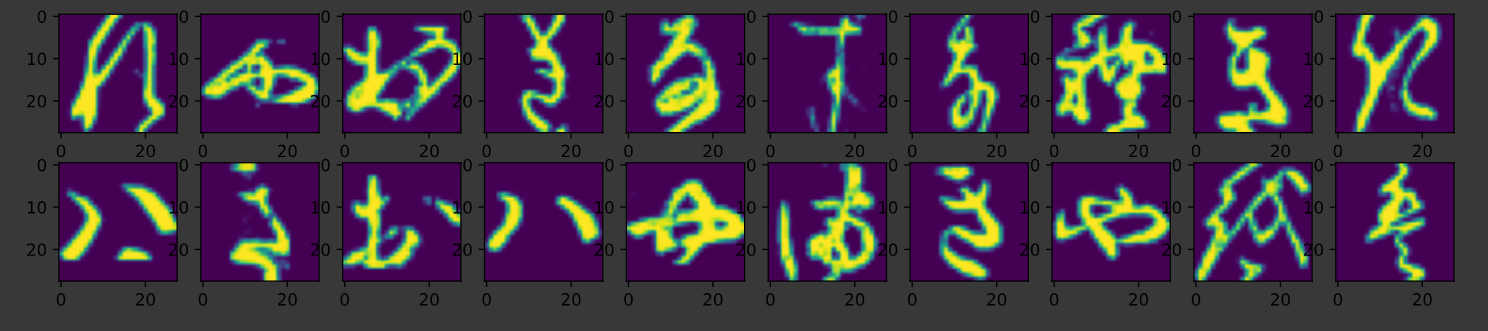

In [147]:
import matplotlib.pyplot as plt
import numpy as np

In [148]:
image = np.squeeze(X[0])
image.shape

torch.Size([28, 28])

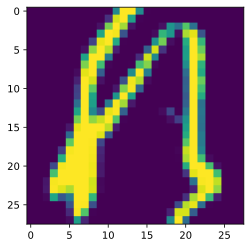

In [149]:
plt.imshow(image)
plt.show()

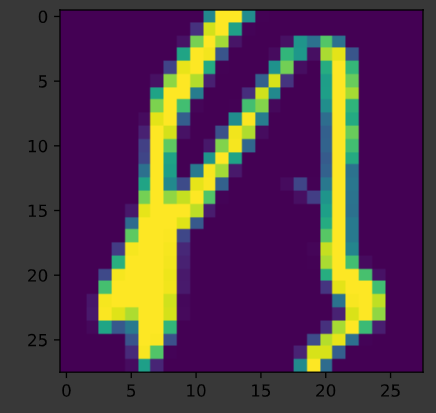

In [150]:
batch_size = 256
def get_dataloader_workers():
  """Use 4 processes to read the data."""
  return 4

train_iter = data.DataLoader(kmnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [151]:
timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f} sec'


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'6.17 sec'

In [152]:
def load_data_kmnist(batch_size, resize=None):
  """Download the KMNIST dataset and then load it into memory."""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  kmnist_train = torchvision.datasets.KMNIST(
    root="../data", train=True, transform=trans, download=True)
  kmnist_test = torchvision.datasets.KMNIST(
    root="../data", train=False, transform=trans, download=True)
  return (data.DataLoader(kmnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()), data.DataLoader(kmnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

In [153]:
train_iter, test_iter = load_data_kmnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


3.6 Implementation of Softmax Regression from Scratch


In [154]:
import torch
from IPython import display
from d2l import torch as d2l

In [191]:
batch_size = 256 
train_iter, test_iter = load_data_kmnist(batch_size)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [192]:
num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


In [193]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)


(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [194]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition # The broadcasting mechanism is applied here

In [195]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0588, 0.2364, 0.0066, 0.0894, 0.6089],
         [0.1098, 0.0990, 0.6601, 0.0529, 0.0782]]), tensor([1.0000, 1.0000]))

In [196]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [197]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]


tensor([0.1000, 0.5000])

In [198]:
def cross_entropy(y_hat, y):
  return - torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)


tensor([2.3026, 0.6931])

In [199]:
def accuracy(y_hat, y):
  """Compute the number of correct predictions."""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())


In [200]:
accuracy(y_hat, y) / len(y)


0.5

In [201]:
def evaluate_accuracy(net, data_iter):
  """Compute the accuracy for a model on a dataset."""
  if isinstance(net, torch.nn.Module):
    net.eval() # Set the model to evaluation mode
  metric = Accumulator(2) # No. of correct predictions, no. of predictions
  with torch.no_grad():
    for X, y in data_iter:
      metric.add(accuracy(net(X), y), y.numel())
  return metric[0] / metric[1]


In [202]:
class Accumulator: 
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [203]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.1019

In [204]:
def train_epoch_ch3(net, train_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
      # Compute gradients and update parameters
      y_hat = net(X)
      l = loss(y_hat, y)
      if isinstance(updater, torch.optim.Optimizer):
        # Using PyTorch in-built optimizer & loss criterion
          updater.zero_grad()
          l.mean().backward()
          updater.step()
      else:
        # Using custom built optimizer & loss criterion
          l.sum().backward()
          updater(X.shape[0])
      metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
# Return training loss and training accuracy
  return metric[0] / metric[2], metric[1] / metric[2]

In [205]:
class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
              if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)

        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
          self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [206]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [207]:
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

AssertionError: ignored

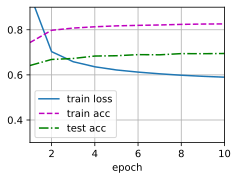

In [208]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)


3.7 Using torch function

In [209]:
import torch
from torch import nn
from d2l import torch as d2l

In [210]:
batch_size = 256
train_iter, test_iter = load_data_kmnist(batch_size)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [211]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);


In [212]:
loss = nn.CrossEntropyLoss(reduction='none')

In [213]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)


AssertionError: ignored

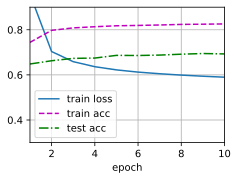

In [214]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
